In [2]:
# Package imports
import numpy as np
from sklearn.model_selection import train_test_split

# Matplotlib is a matlab like plotting library
import matplotlib
from matplotlib import pyplot as plt
# SciKitLearn is a useful machine learning utilities library
import sklearn
# The sklearn dataset module helps generating/datasets
import sklearn.datasets
import sklearn.linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize
from scipy.stats import gaussian_kde

In [3]:
# importing dataset
# import data
from DataExtraction import dataNoMass as data
from DataExtraction import dataWithP2
from DataExtraction import dataWithP2E2 
from DataExtraction import dataWithMass 
# from DataExtraction import p2E2 as data
# from DataExtraction import e2P2Dec as data
from DataExtraction import labels
#from DataExtraction import labels2D as labels
data = np.array(data)
labels = np.array(labels)
labels = np.row_stack(labels)
#labels = labels.T
print(labels.shape)

(79102, 1)


In [5]:
# split data 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=0.5, test_size=0.5, random_state=42)

In [6]:
# count percentage that are muons
sum(train_labels)/len(train_labels)


array([0.50003793, 0.49996207])

In [7]:
# normalize data here
train_means = np.mean(train_data, axis=0)
test_means = np.mean(test_data, axis=0)
print(train_means)
print(test_means)
print(train_data[0,:])
train_data[:, 0] = train_data[:,0]/train_means[0]
train_data[:, 1] = train_data[:,1]/train_means[1]
train_data[:, 2] = train_data[:,2]/train_means[2]
train_data[:, 3] = train_data[:,3]/train_means[3]
print(train_data[0,:])

test_data[:, 0] = test_data[:,0]/test_means[0]
test_data[:, 1] = test_data[:,1]/test_means[1]
test_data[:, 2] = test_data[:,2]/test_means[2]
test_data[:, 3] = test_data[:,3]/test_means[3]

[ 7.66797549e+01  5.31679903e-03 -2.34019611e-02  1.41026484e+02]
[ 6.98907113e+01  1.27724424e-03 -1.92185404e-02  1.28480801e+02]
[28.73596191  0.8398658  -0.11143488 39.48083318]
[  0.37475292 157.96455704   4.76177547   0.27995333]


In [8]:
# any other data manipulations/printing here
for i in range(5):
    print(train_data[i])
    print(labels[i])
    
print("label shape", labels.shape)
labels.shape[0]

[  0.37475292 157.96455704   4.76177547   0.27995333]
[1 0]
[  0.616931   248.17200162  25.31018075   0.6723506 ]
[1 0]
[  1.97986625 178.24882808  11.52084536   1.59722591]
[0 1]
[  4.37449032 -73.64772462 -29.75469983   2.56321181]
[1 0]
[   0.42328087  -55.73577897 -108.08356765    0.24032937]
[1 0]
label shape (79102, 2)


79102

In [9]:
# define softmax
def softmax(z):
    #Calculate exponent term first
    exp_scores = np.exp(z)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [10]:
# define loss functions

# softmax loss
def softmax_loss(y,y_hat):
    # clipping value 
    minval = 0.000000000001
    # number of samples
    m = y.shape[0]
    # loss formula, note that np.sum sums up the entire matrix and therefore does the job of two sums from the formula 
    loss = -1/m * np.sum(y * np.log(y_hat.clip(min=minval)))
    return loss

# crossentropy loss
def crossEntropy_loss(y, y_hat):
    m = y.shape[0]
    if y.all() == 1:
        return -1/m * np.sum(np.log(y_hat))
    else:
        return -1/m * np.sum(np.log(1 - y_hat))

# mse loss
def mse_loss(y, y_hat):
    m = y.shape[0]
    return np.sum((y_hat - y)**2) / m


In [11]:
# define derivatives

# loss derivative
def loss_derivative(y,y_hat):
    return (y_hat-y)

# tanh derivative
def tanh_derivative(x):
    return (1 - np.power(x, 2))


In [12]:
# forward propogation
def forward_prop(model, a0):
    
    #Start Forward Propagation
    
    # Load parameters from model (1)
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Do the first Linear step 
    # Z1 is the input layer x times the dot product of the weights + our bias b
    z1 = a0.dot(W1) + b1
    
    # Put it through the first activation function
    a1 = np.tanh(z1)
    
    # Second linear step
    z2 = a1.dot(W2) + b2
    
    # Second activation function
    a2 = softmax(z2)
    #print("a2 shape", a2.shape)
    #Store all results in these values
    cache = {'a0':a0,'z1':z1,'a1':a1,'z2':z2,'a2':a2}
    return cache
    

In [13]:
# This is the BACKWARD PROPAGATION function
def backward_prop(model,cache,y):

    # Load parameters from model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # add weights to print list
    w00.append(W1[0])
    w01.append(W1[1])
    w02.append(W1[2])
    w03.append(W1[3])
    w10.append(W1[0])
    w11.append(W1[1])
    
    # Load forward propagation results
    a0,a1,a2 = cache['a0'],cache['a1'],cache['a2']

    # Get number of samples
    m = y.shape[0]

    # Calculate loss derivative with respect to output
    dz2 = loss_derivative(y=y,y_hat=a2)
    # dz2 = .03

    # Calculate loss derivative with respect to second layer weights
    dW2 = 1/m*(a1.T).dot(dz2) #dW2 = 1/m*(a1.T).dot(dz2) 
    #dW2 = 0.4
    
    # Calculate loss derivative with respect to second layer bias
    db2 = 1/m*np.sum(dz2, axis=0)
    # db2 = .05
    
    dz1 = np.multiply(dz2.dot(W2.T),tanh_derivative(a1))
    # dz1 = .06
    
    dW1 = 1/m*np.dot(a0.T,dz1)
    # dW1 = .07
    
    db1 = 1/m*np.sum(dz1,axis=0)
    # db1 = .08
    
    # Store gradients
    grads = {'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads


In [14]:
#TRAINING PHASE
def initialize_parameters(nn_input_dim,nn_hdim,nn_output_dim):
    # First layer weights
    W1 = 2 *np.random.randn(nn_input_dim, nn_hdim) - 1
    
    # First layer bias
    b1 = np.zeros((1, nn_hdim))
    
    # Second layer weights
    W2 = 2 * np.random.rand(nn_hdim, nn_output_dim)
    b2 = np.zeros((1,nn_output_dim))
    
    
    # Package and return model
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model
def update_parameters(model,grads,learning_rate):
    # Load parameters
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Update parameters
    W1 -= learning_rate * grads['dW1']
    #W1 = W1 +W1*.001
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    #W2 = abs(W2) +W2*.001
    b2 -= learning_rate * grads['db2']
#     W1 = learning_rate * W1# * grads['dW1']
#     b1 = learning_rate * b1
#     W2 = learning_rate * W2
#     b2 = learning_rate * b2

    
    # Store and return parameters
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model
def predict(model, x):
    # Do forward pass
    c = forward_prop(model,x)
    #get y_hat
    y_hat = c['a2']
    # plotArr.append([x, y_hat]) #added to make plot
    return y_hat
def calc_accuracy(model,x,y):
    # Get total number of examples
    m = y.shape[0]
    # Do a prediction with the model
    pred = predict(model,x)
    # Ensure prediction and truth vector y have the same shape
    pred = pred.reshape(y.shape)
    # Calculate the number of wrong examples
    error = np.sum(np.abs(pred-y))
    # Calculate accuracy
    return (m - error)/m * 100
def train(model,X_,y_,learning_rate, epochs, print_loss=False):
    # Gradient descent. Loop over epochs
    for i in range(0, epochs):
        if(i==0):
            print("bias on first epoch is:", model['b1'][0], )
        # Forward propagation
        cache = forward_prop(model,X_)
        #a1, probs = cache['a1'],cache['a2']
        # Backpropagation
        
        grads = backward_prop(model,cache,y_)
        # Gradient descent parameter update
        # Assign new parameters to the model
        model = update_parameters(model=model,grads=grads,learning_rate=learning_rate)
        
        a2 = cache['a2']
        thisLoss = mse_loss(y_,a2) # set loss function here
        losses.append(thisLoss)
        y_hat = predict(model,X_) # getting rid of this because it's wrong
        y_true = y_.argmax(axis=1)
        accur = accuracy_score(a2,train_labels)
        train_accuracies.append(accur)
        b1 = model['b1'][0]
        b2 = model['b2'][0]
        
        b1s.append(b2)
        b2s.append(b2)
        if i % 50 == 0:
            placeholderVar = accuracy_score(a2, train_labels)
            test_accuracy = accuracyOfModel(model, test_data, test_labels)
            test_accuracies.append(test_accuracy)
            test_num.append(i)
        #Printing loss & accuracy every 100 iterations
        if print_loss and i % 300==0:
            print('Loss after iteration',i,':',thisLoss)
            print('Train Accuracy after iteration',i,':',accur*100,'%')
            print('Test Accuracy after iteration',i,':',test_accuracy*100,'%')
    return model

In [18]:
# TESTING PHASE
# test the accuracy of any model
def accuracyOfModel(_model, _testData, _testLabels):
    y_pred = predict(_model,_testData) # make predictions on test data
    y_true = _testLabels # get usable info from labels
    return accuracy_score(y_pred, y_true)

def accuracy_score(_outputNodes, _labels):
    for i in range(len(_outputNodes)-1):
        if _outputNodes[i][0]>.5:
            _outputNodes[i]=[1,0]
        else:
            _outputNodes[i]=[0,1]
    numWrong = np.count_nonzero(np.subtract(_outputNodes,_labels))/2
    return (len(_outputNodes)-numWrong)/len(_outputNodes)


In [19]:
# plotArr = []
losses = []
train_accuracies = []
test_accuracies = []
test_num = []
w00 = []
w01 = []
w02 = []
w03 = []
w10 = []
w11 = []
b1s = []
b2s = []
learnRate = 0.01
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=4, nn_hdim= 2, nn_output_dim= 2)
model = train(model,train_data,train_labels,learning_rate=learnRate,epochs=1801,print_loss=True)

bias on first epoch is: [0. 0.]
Loss after iteration 0 : 0.6686908691886901
Train Accuracy after iteration 0 : 49.953224950064474 %
Test Accuracy after iteration 0 : 50.41339030618695 %
Loss after iteration 300 : 0.5081773968285256
Train Accuracy after iteration 300 : 50.029076382392354 %
Test Accuracy after iteration 300 : 50.41591868726455 %
Loss after iteration 600 : 0.5003781530818492
Train Accuracy after iteration 600 : 50.04677504993552 %
Test Accuracy after iteration 600 : 50.42350383049733 %
Loss after iteration 900 : 0.500030415455965
Train Accuracy after iteration 900 : 50.03918990670274 %
Test Accuracy after iteration 900 : 50.426032211574935 %
Loss after iteration 1200 : 0.500002757948445
Train Accuracy after iteration 1200 : 50.01643447700438 %
Test Accuracy after iteration 1200 : 50.41339030618695 %
Loss after iteration 1500 : 0.49999986284498393
Train Accuracy after iteration 1500 : 50.01896285808197 %
Test Accuracy after iteration 1500 : 50.426032211574935 %
Loss after 

In [28]:
print("weight 1 \n", model['W1'])
print("bias 1 \n", model['b1'])
print("weight 2 \n", model['W2'])
print("bias 2 \n", model['b2'])

weight 1 
 [[ 2.52807724 -0.1997241 ]
 [ 0.94205907  3.47994613]
 [ 2.74042464 -2.95670166]
 [ 0.90032069 -1.30273688]]
bias 1 
 [[-1.75435697e-04 -4.18495941e-05]]
weight 2 
 [[1.34817337 1.34603519]
 [1.31954697 1.32169295]]
bias 2 
 [[ 4.29695334e-05 -4.29695334e-05]]


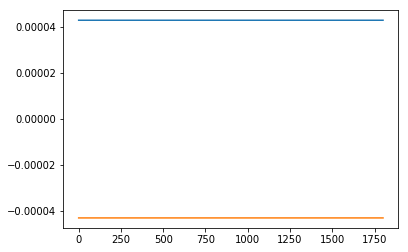

In [29]:
plt.plot(b2s, label="b2s")

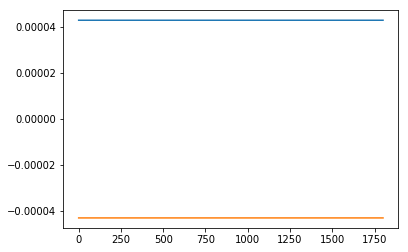

In [30]:
plt.plot(b1s, label="b1s")

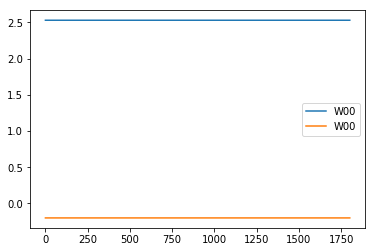

In [31]:
plt.plot(w00, label="W00")
plt.legend()

Text(0, 0.5, 'Score')

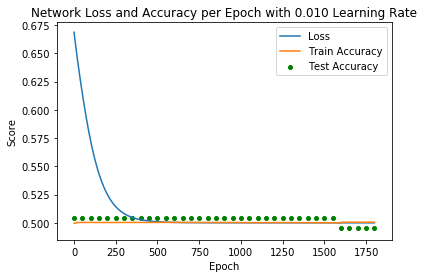

In [32]:
plt.plot(losses, label="Loss")
plt.plot(train_accuracies, label="Train Accuracy")
plt.scatter(test_num, test_accuracies, label="Test Accuracy", s=16, color="green")
#plt.plot(test_accuracies, label="Test Accuracy")
plt.plot()
plt.legend()
plt.title("Network Loss and Accuracy per Epoch with %1.3f Learning Rate" %learnRate)
plt.xlabel("Epoch")
plt.ylabel("Score")

In [33]:
cache = forward_prop(model, test_data)
testgrads = backward_prop(model,cache,train_labels)

In [34]:
print("cache a0", cache['a0'])
print("cache a1", cache['a1'])
print("cache z1", cache['z1'])
print("cache a2", cache['a2'])
print("cache z2", cache['z2'])
print("Average output value: ", sum(cache['a2'])/len(cache['a2']))

cache a0 [[ 4.36329873e-01  1.35687505e+03  9.48712220e+01  6.92442674e-01]
 [ 4.14724928e-01 -6.15246283e+02  1.57180714e+02  2.98917155e-01]
 [ 1.79900165e+00 -1.24268291e+03  9.12023240e+01  2.49282159e+00]
 ...
 [ 3.28033062e-01 -6.13926365e+02 -2.55723288e+00  2.36171078e-01]
 [ 6.76026138e-01  3.32015283e+02  5.62037844e+00  4.01308377e-01]
 [ 4.70177093e-01  4.97008101e+02 -5.55076263e+01  3.09054226e-01]]
cache a1 [[ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 ...
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
cache z1 [[ 1539.97020293  4440.35692337]
 [ -147.53903704 -2606.23268259]
 [ -913.9554302  -4597.73447902]
 ...
 [ -584.32105721 -2129.24293081]
 [  330.2504093   1138.11965727]
 [  317.56323855  1893.18434471]]
cache a2 [[0.50001953 0.49998047]
 [0.50002343 0.49997657]
 [0.50002343 0.49997657]
 ...
 [0.50002343 0.49997657]
 [0.50001953 0.49998047]
 [0.50001953 0.49998047]]
cache z2 [[ 2.66776331  2.66768517]
 [-2.66767737 -2.66777111]
 [-2.66767737 -2.66777111]
 ...
 [-2.66767737 -2.66777111]
 [

In [27]:
print("test grads dW2", testgrads['dW2'])
print("test grads db2", testgrads['db2'])
print("test grads dW1", testgrads['dW1'])
print("test grads db1", testgrads['db1'])

test grads dW2 [[-0.00287469  0.00287469]
 [-0.00302094  0.00302094]]
test grads db2 [-1.16372028e-05  1.16372028e-05]
test grads dW1 [[-3.26215676e-08 -6.88962868e-08]
 [-1.16640776e-05 -5.28359465e-06]
 [ 4.04138051e-06 -6.19033090e-06]
 [-1.48177597e-08 -3.75545181e-08]]
test grads db1 [-4.38604758e-08 -8.21095492e-09]
